In [1]:
from ttp import NSGA_II, city_traversal, items_values, get_objective_functions
from reader import get_problem_instances, ProblemInstance

instances = get_problem_instances('input_example.json')

In [4]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from os import path

def dominates(x: tuple, y: tuple) -> bool :
    if x[0] <= y[0] and -x[1] <= -y[1] :
        if x[0] < y[0] or -x[1] < -y[1] :
            return True
    
    return False

for instance in instances :
    population = NSGA_II(instance)

    n = instance.no_cities
    m = instance.no_items

    ko, tso, w, d, a = get_objective_functions(instance)

    int_to_perm, perm_to_int, dist_into_boolean_vector, boolean_vector_to_dist = city_traversal(n - 1)
    int_to_decision_vector, decision_vector_to_int = items_values(m)

    decoded_population = list(map(lambda x : (int_to_perm(x[0]), int_to_decision_vector(x[1])), population))
    objective_values = list(map(lambda x: (tso(x[0], x[1]), -ko(x[1])), decoded_population))

    is_in_pareto_front = [True for _ in objective_values]

    for ov1 in objective_values :
        for index, ov2 in enumerate(objective_values) :
            if dominates(ov1, ov2) :
                is_in_pareto_front[index] = False

    ovdf = pd.DataFrame(objective_values, columns = ['tso', 'ko'])

    ovdf['is_in_pareto_front'] = is_in_pareto_front
    ovdf['tour'] = decoded_population

    display(ovdf)

    instance_filename = 'capacity' + str(instance.capacity) + '_' + 'cities' + str(instance.no_cities) + '_' + 'items' + str(instance.no_items) + '_' + 'distances' + str(sum(instance.distances)) + '_' + 'values' + str(sum(instance.values)) + '_' + 'weights' + str(sum(instance.weights)) + '.pkl'

    if path.exists(instance_filename) == False :
        ovdf.to_pickle(instance_filename)

,tso,ko,is_in_pareto_front,tour
0,22.04,34,True,"([0, 3, 2, 1], [True, False, False])"
1,33.11,65,True,"([0, 1, 2, 3], [False, True, True])"
2,29.41,59,False,"([0, 3, 2, 1], [True, False, True])"
3,20.00,0,True,"([0, 1, 2, 3], [False, False, False])"
4,38.91,74,True,"([0, 3, 2, 1], [True, True, False])"
5,20.93,25,True,"([0, 1, 2, 3], [False, False, True])"
6,26.08,34,False,"([0, 2, 1, 3], [True, False, False])"
7,28.59,59,True,"([0, 2, 1, 3], [True, False, True])"
8,22.00,0,False,"([0, 3, 1, 2], [False, False, False])"
9,28.59,59,True,"([0, 2, 1, 3], [True, False, True])"


,tso,ko,is_in_pareto_front,tour
0,15.17,10,False,"([0, 3, 2, 1], [True, True, True, True, False])"
1,8.92,6,True,"([0, 2, 3, 1], [False, True, False, True, False])"
2,8.63,3,False,"([0, 1, 3, 2], [False, False, True, False, Fal..."
3,8.00,0,True,"([0, 1, 3, 2], [False, False, False, False, Fa..."
4,10.85,7,False,"([0, 2, 3, 1], [False, False, True, True, False])"
5,14.28,10,True,"([0, 2, 3, 1], [True, False, False, True, True])"
6,9.28,5,False,"([0, 2, 3, 1], [True, False, False, True, False])"
7,11.33,5,False,"([0, 1, 3, 2], [False, False, False, False, Tr..."
8,12.15,9,False,"([0, 2, 3, 1], [False, True, True, True, False])"
9,9.88,7,True,"([0, 2, 3, 1], [True, True, False, True, False])"


,tso,ko,is_in_pareto_front,tour
0,8.43,5,False,"([0, 1, 3, 2], [False, False, False, False, Tr..."
1,8.96,12,True,"([0, 2, 3, 1], [False, False, True, True, True])"
2,8.00,0,True,"([0, 1, 3, 2], [False, False, False, False, Fa..."
3,11.38,14,False,"([0, 1, 3, 2], [False, True, True, True, True])"
4,13.33,15,False,"([0, 3, 1, 2], [True, True, True, True, True])"
5,8.83,8,False,"([0, 2, 3, 1], [False, False, True, False, True])"
6,9.31,14,True,"([0, 2, 3, 1], [False, True, True, True, True])"
7,9.38,12,False,"([0, 1, 3, 2], [False, False, True, True, True])"
8,9.11,10,False,"([0, 2, 3, 1], [False, True, True, False, True])"
9,10.36,13,False,"([0, 1, 3, 2], [True, False, True, True, True])"


,tso,ko,is_in_pareto_front,tour
0,22.04,34,True,"([0, 3, 2, 1], [True, False, False])"
1,33.11,65,True,"([0, 1, 2, 3], [False, True, True])"
2,51.46,74,False,"([0, 2, 3, 1], [True, True, False])"
3,20.00,0,True,"([0, 1, 2, 3], [False, False, False])"
4,38.91,74,True,"([0, 3, 2, 1], [True, True, False])"
5,20.93,25,True,"([0, 1, 2, 3], [False, False, True])"
6,28.59,59,True,"([0, 2, 1, 3], [True, False, True])"
7,22.00,0,False,"([0, 3, 1, 2], [False, False, False])"
8,28.59,59,True,"([0, 2, 1, 3], [True, False, True])"
9,20.00,0,True,"([0, 3, 2, 1], [False, False, False])"


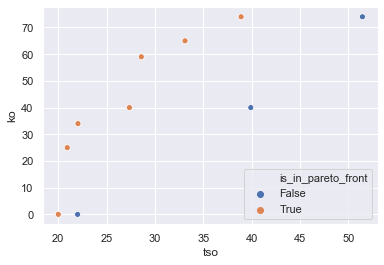

In [5]:
ovdf1 = pd.read_pickle('capacity80_cities4_items3_distances34_values99_weights91.pkl')
display(ovdf1)

sns.scatterplot(x = "tso", y = "ko", hue = "is_in_pareto_front", data = ovdf1[['tso', 'ko', 'is_in_pareto_front']])
plt.show()